In [118]:
import xarray as xr
import netCDF4 as NC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib.colors import LogNorm
from cmocean import cm
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stat

In [119]:
def calc_stats(x, y):
    stats = {}
    MSE = np.mean((y - x)**2)
    stats['RMSE'] = np.sqrt(MSE)
    stats['bias'] = np.mean(y) - np.mean(x)
    stats['WSS'] = 1 - MSE / np.mean((abs(y - np.mean(x)) + abs(x - np.mean(x)))**2)
    
    return stats


def plot_panel(ax, x, y, lims, units):
    stats = calc_stats(x, y)

    statstext = f"RMSE = {stats['RMSE']:.3f} {units}\nbias = {stats['bias']:.3f} {units}\nWSS = {stats['WSS']:.3f}"
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.9)
    c = ax.text(0.01, 0.8, statstext, bbox=props, transform=ax.transAxes, fontsize=9)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    return c

In [120]:
dfo_ctd2011 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20110101_20111231.csv')
dfo_ctd2012 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20120101_20121231.csv')
dfo_ctd2013 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20130101_20131231.csv')
dfo_ctd2014 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20140101_20141231.csv')
dfo_ctd2015 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20150101_20151231.csv')
dfo_ctd2016 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20160101_20161231.csv')
dfo_ctd2017 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20170101_20171231.csv')
dfo_ctd2018 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20180101_20181231.csv')
dfo_ctd2019 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20190101_20191231.csv')


In [121]:

bot2011 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2012 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2013 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2014 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2015 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2016 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2017 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2018 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2019 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2019 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')

In [122]:
ncei_bot2011 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20110101_20111231.csv')
ncei_bot2012 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20120101_20121231.csv')
ncei_bot2013 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20130101_20131231.csv')
ncei_bot2014 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20140101_20141231.csv')
ncei_bot2015 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20150101_20151231.csv')
ncei_bot2016 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20160101_20161231.csv')
ncei_bot2017 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20170101_20171231.csv')
ncei_bot2018 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20180101_20181231.csv')

In [123]:
bot = pd.concat([bot2011, bot2012, bot2013, bot2014, bot2015, bot2016, bot2017, bot2018, bot2019], ignore_index=True)
#obs.name = 'bottle'
dfo_ctd = pd.concat([dfo_ctd2011, dfo_ctd2012, dfo_ctd2013, dfo_ctd2014, dfo_ctd2015, dfo_ctd2016, dfo_ctd2017, dfo_ctd2018, dfo_ctd2019], ignore_index=True)
ncei_bot = pd.concat([ncei_bot2011, ncei_bot2012, ncei_bot2013, ncei_bot2014, ncei_bot2015, ncei_bot2016, ncei_bot2017, ncei_bot2018], ignore_index=True)

#dfo_ctd
ncei_bot.head()

,Unnamed: 0,cid,cruise,dtUTC,Lat,Lon,name,Z,CT,SA,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
0,0,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,2.467178,12.281575,29.887370,...,244,19.653404,41.027050,1.975080,0.588942,0.193720,29.252359,12.293814,219.084015,2
1,1,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,4.983907,12.231575,29.904359,...,244,20.303905,41.439339,1.936729,0.535777,0.193011,29.506512,12.156579,208.136368,4
2,2,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,4.985890,12.278282,29.885267,...,244,20.303905,41.439339,1.936729,0.535777,0.193011,29.506512,12.156579,208.136368,4
3,3,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,4.985890,12.275240,29.886272,...,244,20.303905,41.439339,1.936729,0.535777,0.193011,29.506512,12.156579,208.136368,4
4,4,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,4.986881,12.274192,29.888282,...,244,20.303905,41.439339,1.936729,0.535777,0.193011,29.506512,12.156579,208.136368,4


In [124]:
grid = xr.open_dataset('/ocean/atall/MOAD/grid/grid_from_lat_lon_mask999.nc')
with xr.open_dataset('/data/atall/MEOPAR/grid/mesh_mask202108.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy
    long = mesh.nav_lon
    latg = mesh.nav_lat
mesh

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, z: 40, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  07/08/2021 17:25:49 -0700

In [125]:
# Saanich_Inlet = [330, 377, 180, 205]   # (jj_bot, jj_top, ii_left, ii_right) = (j1, j2, i1, i2)
#latSI1 = np.array(latg.sel(y=330, x=180))
#lonSI1 = np.array(long.sel(y=330, x=180))
#latSI2 = np.array(latg.sel(y=377, x=180))
#lonSI2 = np.array(long.sel(y=330, x=205))

# Sill_SI_SoG = [378, 383, 185, 205]     # connection between Saanich Inlet and Strait of Georgia
#latSIS1 = np.array(latg.sel(y=377, x=180))
#lonSIS1 = np.array(long.sel(y=340, x=180))
#latSIS2 = np.array(latg.sel(y=390, x=180))
#lonSIS2 = np.array(long.sel(y=340, x=220))

#Hood_Canal = [70, 165, 85, 170]

#latHC1 = np.array(latg.sel(y=60, x=95))
#lonHC1 = np.array(long.sel(y=60, x=95))
#latHC2 = np.array(latg.sel(y=240, x=95))
#lonHC2 = np.array(long.sel(y=60, x=200))

lonSI1 = -123.58
lonSI2 = -123.44
latSI1 = 48.5
latSI2 = 48.695

lonSIS1 = -123.485
lonSIS2 = -123.397
latSIS1 = 48.6949
latSIS2 = 48.735

lonHC1 = -123.18
lonHC2 = -122.58
latHC1 = 47.348
latHC2 = 47.91

lonHCS1 = -122.72
lonHCS2 = lonHC2
latHCS1 = latHC2
latHCS2 = 48.16

pointSI_leftbot = [lonSI1, latSI1]
pointSI_rightbot = [lonSI2, latSI1]
pointSI_leftop = [lonSI1, latSI2]
pointSI_rightop = [lonSI2, latSI2]

pointSIS_leftbot = [lonSIS1, latSIS1]
pointSIS_rightbot = [lonSIS2, latSIS1]
pointSIS_leftop = [lonSIS1, latSIS2]
pointSIS_rightop = [lonSIS2, latSIS2]

print(lonSI1, lonSI2, latSI1, latSI2)
print(lonSIS1, lonSIS2, latSIS1, latSIS2)
print(lonHC1, lonHC2, latHC1, latHC2)
print(lonHCS1, lonHCS2, latHCS1, latHCS2)

-123.58 -123.44 48.5 48.695
-123.485 -123.397 48.6949 48.735
-123.18 -122.58 47.348 47.91
-122.72 -122.58 47.91 48.16


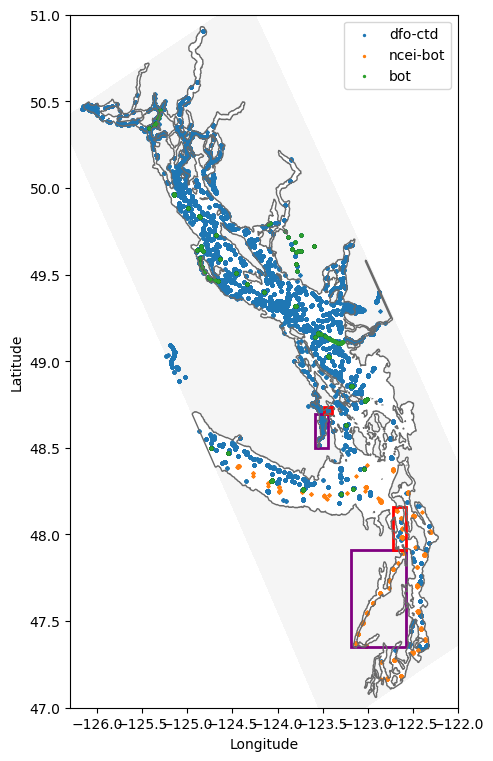

In [126]:
fig, ax = plt.subplots(1,1,figsize=(5, 9))

ax.contourf(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
#ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_ylim([47,48.5])
#ax.set_xlim([-123.5,-122])
ax.set_ylim([47,51])
ax.set_xlim([-126.3,-122])

# plot the location of observations
ax.scatter(dfo_ctd.Lon[dfo_ctd.name != 'bottle'], dfo_ctd.Lat[dfo_ctd.name != 'bottle'], s=2, label="dfo-ctd")
ax.scatter(ncei_bot.Lon[ncei_bot.name != 'ctd'], ncei_bot.Lat[ncei_bot.name != 'ctd'], s=2, label="ncei-bot")
ax.scatter(bot.Lon, bot.Lat, s=2, label="bot")
ax.legend()
#ax.plot([lonSI1, lonSI2, lonSI2, lonSI1, lonSI1], [latSI1, latSI1, latSI2, latSI2, latSI1], '-','r')
leftSI, bottomSI, widthSI, heightSI = (lonSI1, latSI1, lonSI2-lonSI1, latSI2-latSI1)
leftSIS, bottomSIS, widthSIS, heightSIS = (lonSIS1, latSIS1, lonSIS2-lonSIS1, latSIS2-latSIS1)
leftSIn, bottomSIn, widthSIn, heightSIn = (lonCB1, latCB1, lonCB2-lonCB1, latCB2-latCB1)
leftHC, bottomHC, widthHC, heightHC = (lonHC1, latHC1, lonHC2-lonHC1, latHC2-latHC1)
leftHCS, bottomHCS, widthHCS, heightHCS = (lonHCS1, latHCS1, lonHCS2-lonHCS1, latHCS2-latHCS1)
rectSI=mpatches.Rectangle((leftSI,bottomSI),widthSI,heightSI, 
                        fill=False,
                        #alpha=0.1
                        color="purple",
                       linewidth=2,
                       label="Saanich Inlet")
rectSIS=mpatches.Rectangle((leftSIS,bottomSIS),widthSIS,heightSIS, 
                        fill=False,
                        #alpha=0.1
                        color="red",
                       linewidth=2,
                       label=" SI Sill")
rectHC=mpatches.Rectangle((leftHC,bottomHC),widthHC,heightHC, 
                        fill=False,
                        #alpha=0.1
                        color="purple",
                       linewidth=2,
                       label="Hood Canal")
                       #facecolor="red")
rectHCS=mpatches.Rectangle((leftHCS,bottomHCS),widthHCS,heightHCS, 
                        fill=False,
                        #alpha=0.1
                        color="red",
                       linewidth=2,
                       label="HC-Sill")
plt.gca().add_patch(rectSI)
plt.gca().add_patch(rectSIS)
plt.gca().add_patch(rectHC)
plt.gca().add_patch(rectHCS)

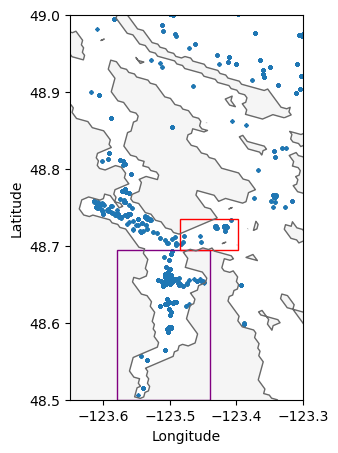

In [127]:
fig, ax = plt.subplots(1,1,figsize=(3, 5))

ax.contourf(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
#ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([48.5,49])
ax.set_xlim([-123.65,-123.3])

# plot the location of observations
ax.scatter(dfo_ctd.Lon[dfo_ctd.name != 'bottle'], dfo_ctd.Lat[dfo_ctd.name != 'bottle'], s=2, label="dfo-ctd")
ax.scatter(ncei_bot.Lon[ncei_bot.name != 'ctd'], ncei_bot.Lat[ncei_bot.name != 'ctd'], s=2, label="ncei-bot")
ax.scatter(bot.Lon, bot.Lat, s=2, label="bot")
#ax.legend()
rectSI=mpatches.Rectangle((leftSI,bottomSI),widthSI,heightSI, 
                        fill=False,
                        #alpha=0.1
                        color="purple",
                       linewidth=1,
                       label="Saanich Inlet")
rectSIS=mpatches.Rectangle((leftSIS,bottomSIS),widthSIS,heightSIS, 
                        fill=False,
                        #alpha=0.1
                        color="red",
                       linewidth=1,
                       label=" SI Sill")
plt.gca().add_patch(rectSI)
plt.gca().add_patch(rectSIS)


In [128]:
#dfo_ctd_SI = dfo_ctd.sel(dfo_ctd.Lon>=lonSI1 & dfo_ctd.Lon<=lonSI2 & dfo_ctd.Lat>=latSI1 & dfo_ctd.Lat<=latSI2)
df_SI = dfo_ctd[ dfo_ctd['Lon'].between(lonSI1, lonSI2) & dfo_ctd['Lat'].between(latSI1, latSI2) ]
df_SIS = dfo_ctd[ dfo_ctd['Lon'].between(lonSIS1, lonSIS2) & dfo_ctd['Lat'].between(latSIS1, latSIS2) ]
df_HC_ncei = ncei_bot[ ncei_bot['Lon'].between(lonHC1, lonHC2) & ncei_bot['Lat'].between(latHC1, latHC2) ]
df_HCS_ncei = ncei_bot[ ncei_bot['Lon'].between(lonHCS1, lonHCS2) & ncei_bot['Lat'].between(latHCS1, latHCS2) ]
df_SI_bot = bot[ bot['Lon'].between(lonSI1, lonSI2) & bot['Lat'].between(latSI1, latSI2) ]
df_SI.head()
#df_HC_ncei.head()
#df_SI_bot.head()

,Unnamed: 0,cid,Lon,Lat,dtUTC,Z,SA,CT,Oxygen_Dissolved,name,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
1152,1152,0.0,-123.5,48.593666,2011-02-09 03:03:49,1.264230,27.735683,7.528035,285.80600,NaN,...,200,20.544540,44.282543,1.302427,0.664882,0.309518,26.034765,6.935633,299.019196,1
1153,1153,0.0,-123.5,48.593666,2011-02-09 03:03:49,2.250820,28.136470,7.662685,278.21426,NaN,...,200,20.567707,44.268246,1.296355,0.672063,0.309120,26.072582,6.935519,298.891785,2
1154,1154,0.0,-123.5,48.593666,2011-02-09 03:03:49,2.962748,28.480493,7.790517,273.74854,NaN,...,200,20.567707,44.268246,1.296355,0.672063,0.309120,26.072582,6.935519,298.891785,2
1155,1155,0.0,-123.5,48.593666,2011-02-09 03:03:49,3.973126,28.507477,7.793270,270.17600,NaN,...,200,20.598902,44.268219,1.287662,0.668508,0.309231,26.163258,6.944715,298.628357,3
1156,1156,0.0,-123.5,48.593666,2011-02-09 03:03:49,4.964661,28.642883,7.855074,266.15683,NaN,...,200,21.164911,44.615482,1.220951,0.670145,0.304190,26.591145,6.941261,294.259247,4


In [129]:
def profilesSI(tracer,colour,ax):
    if tracer == 'Salinity':
        t_obs = 'SA'
        t_mod = 'mod_vosaline'
        unit = 'g/kg'
        unity ='meter'
    elif tracer == 'Temperature':
        t_obs = 'CT'
        t_mod = 'mod_votemper'
        unit = '$^{\circ} C$'
        unity ='meter'
    elif tracer == 'DO':
        t_obs = 'Oxygen_Dissolved'
        t_mod = 'mod_dissolved_oxygen'
        unit = 'uM'
        unity ='meter'
    elif tracer == 'NO3':
        t_obs = 'N'
        t_mod = 'mod_nitrate'
        unit = 'uM'
        unity ='meter'

    avg_obs_SI, bins_SI, _ = stat.binned_statistic(-df_SI['Z'][(np.isfinite(df_SI[t_obs]))],df_SI[t_obs][(np.isfinite(df_SI[t_obs]))],statistic='mean',bins=100)
    avg_mod_SI, bins_SI, _ = stat.binned_statistic(-df_SI['Z'][(np.isfinite(df_SI[t_mod]))],df_SI[t_mod][(np.isfinite(df_SI[t_mod]))],statistic='mean',bins=100)
    avg_obs_SIS, bins_SIS, _ = stat.binned_statistic(-df_SIS['Z'][(np.isfinite(df_SIS[t_obs]))],df_SIS[t_obs][(np.isfinite(df_SIS[t_obs]))],statistic='mean',bins=50)
    avg_mod_SIS, bins_SIS, _ = stat.binned_statistic(-df_SIS['Z'][(np.isfinite(df_SIS[t_mod]))],df_SIS[t_mod][(np.isfinite(df_SIS[t_mod]))],statistic='mean',bins=50)

    ax.plot(avg_mod_SI, bins_SI[:-1], lw=2,ls='dashed',label='mod-SI')
    ax.plot(avg_obs_SI, bins_SI[:-1], lw=2,label='obs-SI')
    ax.plot(avg_mod_SIS, bins_SIS[:-1], lw=2,ls='dashed',label='mod-Sill')
    ax.plot(avg_obs_SIS, bins_SIS[:-1], lw=2,label='obs-Sill')

    title = tracer
    #ax.set_title(title)
    ax.set_xlabel(unit)
    ax.set_ylabel(unity)

def profilesHC(tracer,colour,ax):
    if tracer == 'Salinity':
        t_obs = 'SA'
        t_mod = 'mod_vosaline'
        unit = 'g/kg'
        unity ='meter'
    elif tracer == 'Temperature':
        t_obs = 'CT'
        t_mod = 'mod_votemper'
        unit = '$^{\circ} C$'
        unity ='meter'
    elif tracer == 'DO':
        t_obs = 'Oxygen_Dissolved'
        t_mod = 'mod_dissolved_oxygen'
        unit = 'uM'
        unity ='meter'
    elif tracer == 'NO3':
        t_obs = 'N'
        t_mod = 'mod_nitrate'
        unit = 'uM'
        unity ='meter'

    avg_obs_HC, bins_HC, _ = stat.binned_statistic(-df_HC_ncei['Z'][(np.isfinite(df_HC_ncei[t_obs]))],df_HC_ncei[t_obs][(np.isfinite(df_HC_ncei[t_obs]))],statistic='mean',bins=10)
    avg_mod_HC, bins_HC, _ = stat.binned_statistic(-df_HC_ncei['Z'][(np.isfinite(df_HC_ncei[t_mod]))],df_HC_ncei[t_mod][(np.isfinite(df_HC_ncei[t_mod]))],statistic='mean',bins=10)
    avg_obs_HCS, bins_HCS, _ = stat.binned_statistic(-df_HCS_ncei['Z'][(np.isfinite(df_HCS_ncei[t_obs]))],df_HCS_ncei[t_obs][(np.isfinite(df_HCS_ncei[t_obs]))],statistic='mean',bins=10)
    avg_mod_HCS, bins_HCS, _ = stat.binned_statistic(-df_HCS_ncei['Z'][(np.isfinite(df_HCS_ncei[t_mod]))],df_HCS_ncei[t_mod][(np.isfinite(df_HCS_ncei[t_mod]))],statistic='mean',bins=10)

    ax.plot(avg_mod_HC, bins_HC[:-1],lw=2,ls='dashed',label='mod')
    ax.plot(avg_obs_HC, bins_HC[:-1],lw=2,label='obs')
    ax.plot(avg_mod_HCS, bins_HCS[:-1],lw=2,ls='dashed',label='mod-ADMI')
    ax.plot(avg_obs_HCS, bins_HCS[:-1],lw=2,label='obs-ADMI')

    title = tracer
    #ax.set_title(title)
    ax.set_xlabel(unit)
    ax.set_ylabel(unity)

In [130]:
def prop_prop(ax,stringX,stringY,x,y,binX,binY):
    cmap = cm.rain
    cmap.set_bad('w')
    # cmap.set_extremes(under='w')

    bins = [binX,binY]
    H, xedges, yedges=np.histogram2d(x,y,bins=bins)
    H = H.T
    H_final = np.where(H>0, H, H*np.nan)
    X, Y = np.meshgrid(xedges, yedges)
    im = ax.pcolormesh(X, Y, H_final, cmap=cmap)#, norm=LogNorm(vmin=10, vmax=4500))
    ax.set_ylabel(stringY)
    ax.set_xlabel(stringX)

In [131]:
#set consistent bins
Tbin = np.linspace(5,20,50)
Sbin = np.linspace(20,33,50)
Dbin = np.linspace(0,500,50)
Nbin = np.linspace(0,40,50)

Evaluation of 201111 SalishSeaCast model version of DO, S T (2011-2019) in Saanich Inlet (SI):


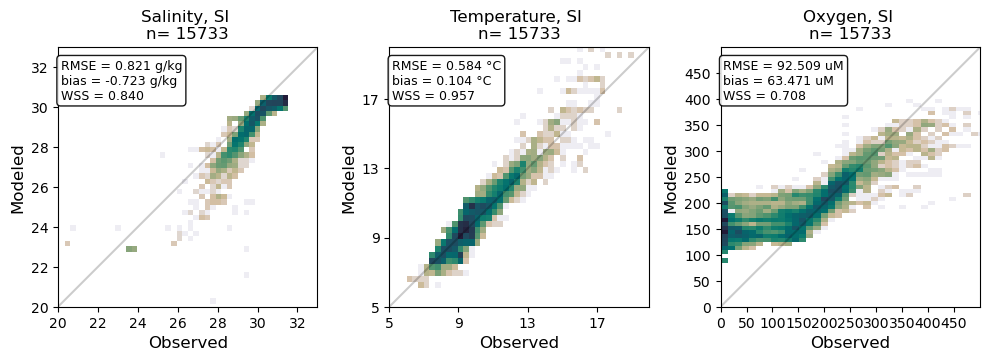

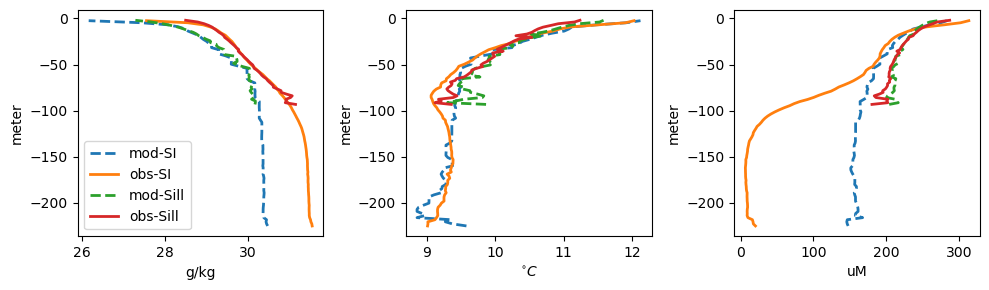

In [132]:
print("Evaluation of 201111 SalishSeaCast model version of DO, S T (2011-2019) in Saanich Inlet (SI):")

cmap = cm.rain

fig, axs = plt.subplots(1, 3, figsize = (10, 5)) 

i, j, k = (0, 1, 2)
axs[i].plot((20,33),(20,33),'k-',alpha=.2)
axs[j].plot((5,20),(5,20),'k-',alpha=.2)
axs[k].plot((0,500),(0,500),'k-',alpha=.2)

iiS=(~np.isnan(df_SI.SA))&(~np.isnan(df_SI.mod_vosaline))
iiT=(~np.isnan(df_SI.CT))&(~np.isnan(df_SI.mod_votemper))
iiO=(~np.isnan(df_SI.Oxygen_Dissolved))&(~np.isnan(df_SI.mod_dissolved_oxygen))

counts, xedges, yedges, m2=axs[i].hist2d(df_SI.loc[iiS,['SA']].values.flatten(),
                                        df_SI.loc[iiS,['mod_vosaline']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[j].hist2d(df_SI.loc[iiT,['CT']].values.flatten(),
                                        df_SI.loc[iiT,['mod_votemper']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[k].hist2d(df_SI.loc[iiO,['Oxygen_Dissolved']].values.flatten(),
                                        df_SI.loc[iiO,['mod_dissolved_oxygen']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

ntickS=np.arange(20, 33, 2)
ntickT=np.arange(5, 20, 4)
ntickO=np.arange(0, 500, 50)

axs[i].set_xlim((20,33))
axs[i].set_ylim((20,33))
axs[i].set_xticks(ntickS)
axs[i].set_yticks(ntickS)

axs[j].set_xlim((5,20))
axs[j].set_ylim((5,20))
axs[j].set_xticks(ntickT)
axs[j].set_yticks(ntickT)

axs[k].set_xlim((0,500))
axs[k].set_ylim((0,500))
axs[k].set_xticks(ntickO)
axs[k].set_yticks(ntickO)

axs[i].set_aspect(1, adjustable='box')
axs[i].set_ylabel('Modeled',fontsize=12)
axs[i].set_xlabel('Observed',fontsize=12)

axs[j].set_aspect(1, adjustable='box')
axs[j].set_ylabel('Modeled',fontsize=12)
axs[j].set_xlabel('Observed',fontsize=12)

axs[k].set_aspect(1, adjustable='box')
axs[k].set_ylabel('Modeled',fontsize=12)
axs[k].set_xlabel('Observed',fontsize=12)

title = 'Salinity, SI '+'\nn= '+str(len(df_SI))
axs[i].set_title(title,fontsize=12)

title = 'Temperature, SI '+'\nn= '+str(len(df_SI))
axs[j].set_title(title,fontsize=12)

title = 'Oxygen, SI '+'\nn= '+str(len(df_SI))
axs[k].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(axs[i], df_SI['SA'], df_SI['mod_vosaline'], (20,33), 'g/kg')
plot_panel(axs[j], df_SI['CT'], df_SI['mod_votemper'], (5,20), '°C')
plot_panel(axs[k], df_SI['Oxygen_Dissolved'], df_SI['mod_dissolved_oxygen'], (0,500), 'uM')
plt.tight_layout()

# plot profiles Saaanich Inlet
fig, ax = plt.subplots(1,3, figsize=(10,3))
profilesSI('Salinity','k',ax[0])
profilesSI('Temperature','k',ax[1])
profilesSI('DO','k',ax[2])
ax[0].legend()
plt.tight_layout()


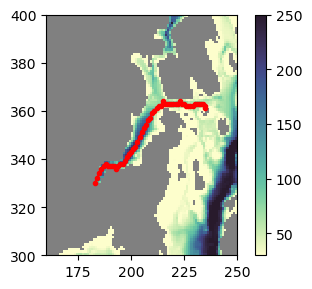

In [133]:
from salishsea_tools import viz_tools
from mpl_toolkits.axes_grid1 import make_axes_locatable
thalweg = np.loadtxt('SaanichInlet_thalweg.txt', delimiter=' ', dtype=int)
grid = NC.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc','r')
bathy = grid.variables['Bathymetry'][:,:]
lats = grid.variables['nav_lat'][:,:]
lons = grid.variables['nav_lon'][:,:]
lone = lons[thalweg[:,0],thalweg[:,1]];
late = lats[thalweg[:,0],thalweg[:,1]];
fig, ax = plt.subplots(1, 1, figsize=(3, 5))
mycmap = cm.deep
mycmap.set_bad('grey')
im = ax.pcolormesh(bathy, cmap=mycmap, vmin=30, vmax=250)
ax.plot(thalweg[:,1],thalweg[:,0],marker='.',color='r')
viz_tools.set_aspect(ax);
ax.set_xlim([160, 250])
ax.set_ylim([300, 400])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

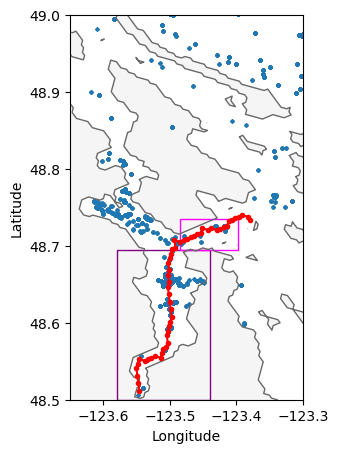

In [134]:
fig, ax = plt.subplots(1,1,figsize=(3, 5))
ax.contourf(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
#ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([48.5,49])
ax.set_xlim([-123.65,-123.3])

# plot the location of observations
ax.scatter(dfo_ctd.Lon[dfo_ctd.name != 'bottle'], dfo_ctd.Lat[dfo_ctd.name != 'bottle'], s=2, label="dfo-ctd")
ax.scatter(ncei_bot.Lon[ncei_bot.name != 'ctd'], ncei_bot.Lat[ncei_bot.name != 'ctd'], s=2, label="ncei-bot")
ax.scatter(bot.Lon, bot.Lat, s=2, label="bot")
ax.plot(lone,late,marker='.',color='r')

rectSI=mpatches.Rectangle((leftSI,bottomSI),widthSI,heightSI, 
                        fill=False,
                        #alpha=0.1
                        color="purple",
                       linewidth=1,
                       label="Saanich Inlet")
rectSIS=mpatches.Rectangle((leftSIS,bottomSIS),widthSIS,heightSIS, 
                        fill=False,
                        #alpha=0.1
                        color="magenta",
                       linewidth=1,
                       label="ADMI")
plt.gca().add_patch(rectSI)
plt.gca().add_patch(rectSIS)

In [135]:
df11 = pd.read_pickle(f'/data/rbeutel/obs/dfo/ctd/2011.p')
df12 = pd.read_pickle(f'/data/rbeutel/obs/dfo/ctd/2012.p')
df13 = pd.read_pickle(f'/data/rbeutel/obs/dfo/ctd/2013.p')
df14 = pd.read_pickle(f'/data/rbeutel/obs/dfo/ctd/2014.p')
df15 = pd.read_pickle(f'/data/rbeutel/obs/dfo/ctd/2015.p')
df16 = pd.read_pickle(f'/data/rbeutel/obs/dfo/ctd/2016.p')
df17 = pd.read_pickle(f'/data/rbeutel/obs/dfo/ctd/2017.p')
df18 = pd.read_pickle(f'/data/rbeutel/obs/dfo/ctd/2018.p')
df19 = pd.read_pickle(f'/data/rbeutel/obs/dfo/ctd/2019.p')
df = pd.concat([df11, df12, df13, df14, df15, df16, df17, df18, df19], ignore_index=True)
df_SI2 = df[ df['lon'].between(lonSI1, lonSI2) & df['lat'].between(latSI1, latSI2) ]
df_SIS2 = df[ df['lon'].between(lonSIS1, lonSIS2) & df['lat'].between(latSIS1, latSIS2) ]
df_th = df[ df['lon'].between(lone.min(), lone.max()) & df['lat'].between(late.min(), late.max()) ]

In [136]:
def distance(thalweg,dx,dy,reverse=False):
    #this function calculates the distance travelled along the thalweg
    #thalweg is the array of grid coordinates.
    #dx is the grid spacing in x (eventually we could send an array in but for now it is a single value).
    #dy is the grid spacing in y (eventually we could send an array in but for now it is a single value).
    
    leng=thalweg.shape
    l =leng[0]
    distance = np.zeros(l)
    d=0
    
    for k in range(1,l):
        i1=thalweg[k-1,1]; i2=thalweg[k,1];
        j1=thalweg[k-1,0]; j2=thalweg[k,0];
        dseg =( (dx*(i2-i1))**2 + (dy*(j2-j1))**2)**(0.5)
        d=d+dseg
        distance[k]=d;
    if reverse == True:
        distance=np.flip(distance)
    return distance

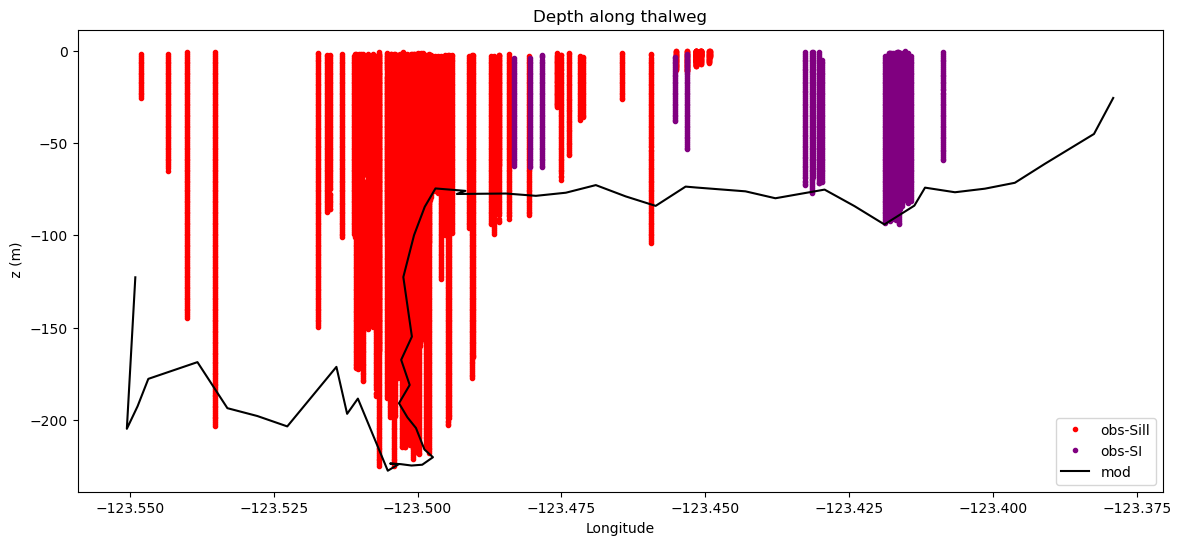

In [137]:
#look at the depths along the thalweg

depths = bathy[thalweg[:,0],thalweg[:,1]];
dx=400; dy=500
d = distance(thalweg,dx,dy,reverse=True); d=d/1000;

fig,ax = plt.subplots(1,1,figsize=(14,6))
#ax.plot(df_th.lon,df_th.z,'.')
ax.plot(df_SI2.lon,df_SI2.z,'.',color='r',label='obs-Sill')
ax.plot(df_SIS2.lon,df_SIS2.z,'.',color='purple',label='obs-SI')
ax.plot(lone,-depths[:],color='k',label='mod')

#plt.ylim(-250,0)
#plt.xlim(0,35)
ax.set_title('Depth along thalweg')
ax.set_xlabel('Longitude')
ax.set_ylabel(' z (m)')
ax.legend()

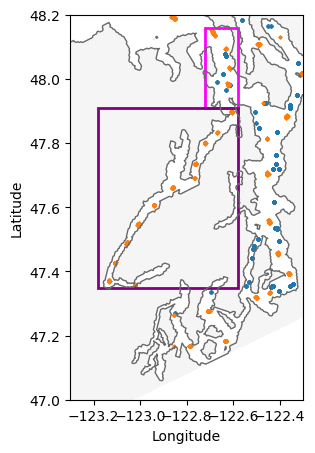

In [138]:
fig, ax = plt.subplots(1,1,figsize=(3, 5))

ax.contourf(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
#ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([47,48.2])
ax.set_xlim([-123.3,-122.3])
#ax.set_ylim([47,51])
#ax.set_xlim([-126.3,-122])

# plot the location of observations
ax.scatter(dfo_ctd.Lon[dfo_ctd.name != 'bottle'], dfo_ctd.Lat[dfo_ctd.name != 'bottle'], s=2, label="dfo-ctd")
ax.scatter(ncei_bot.Lon[ncei_bot.name != 'ctd'], ncei_bot.Lat[ncei_bot.name != 'ctd'], s=2, label="ncei-bot")
ax.scatter(bot.Lon, bot.Lat, s=2, label="bot")
rectHCS=mpatches.Rectangle((leftHCS,bottomHCS),widthHCS,heightHCS, 
                        fill=False,
                        #alpha=0.1
                        color="magenta",
                       linewidth=2,
                       label=" HC-Sill")
rectHC=mpatches.Rectangle((leftHC,bottomHC),widthHC,heightHC, 
                        fill=False,
                        #alpha=0.1
                        color="purple",
                       linewidth=2,
                       label="Hood Canal")
                       #facecolor="red")
plt.gca().add_patch(rectHCS)
plt.gca().add_patch(rectHC)

Evaluation of 201111 SalishSeaCast model version of DO, NO3, S, T (2011-2018) in Hood Canal (HC):


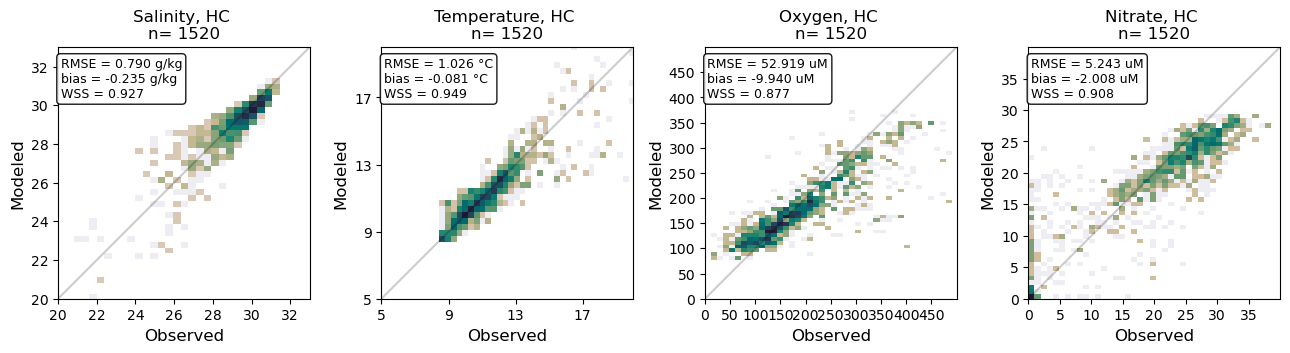

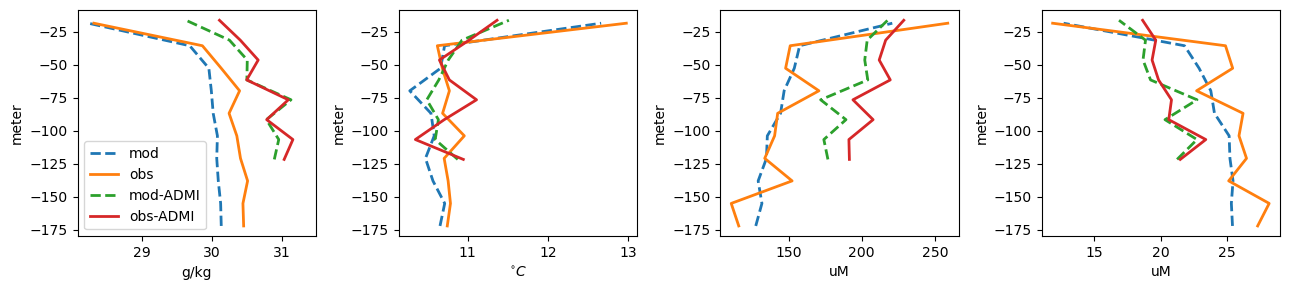

In [139]:
######################### Hood Canal ###################################
print("Evaluation of 201111 SalishSeaCast model version of DO, NO3, S, T (2011-2018) in Hood Canal (HC):")
fig, axs = plt.subplots(1, 4, figsize = (13, 5)) 

i, j, k, l = (0, 1, 2, 3)
axs[i].plot((20,33),(20,33),'k-',alpha=.2)
axs[j].plot((5,20),(5,20),'k-',alpha=.2)
axs[k].plot((0,500),(0,500),'k-',alpha=.2)
axs[l].plot((0,40),(0,40),'k-',alpha=.2)

iiSHC=(~np.isnan(df_HC_ncei.SA))&(~np.isnan(df_HC_ncei.mod_vosaline))
iiTHC=(~np.isnan(df_HC_ncei.CT))&(~np.isnan(df_HC_ncei.mod_votemper))
iiOHC=(~np.isnan(df_HC_ncei.Oxygen_Dissolved))&(~np.isnan(df_HC_ncei.mod_dissolved_oxygen))
iiNHC=(~np.isnan(df_HC_ncei.N))&(~np.isnan(df_HC_ncei.mod_nitrate))

counts, xedges, yedges, m2=axs[i].hist2d(df_HC_ncei.loc[iiSHC,['SA']].values.flatten(),
                                        df_HC_ncei.loc[iiSHC,['mod_vosaline']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[j].hist2d(df_HC_ncei.loc[iiTHC,['CT']].values.flatten(),
                                        df_HC_ncei.loc[iiTHC,['mod_votemper']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[k].hist2d(df_HC_ncei.loc[iiOHC,['Oxygen_Dissolved']].values.flatten(),
                                        df_HC_ncei.loc[iiOHC,['mod_dissolved_oxygen']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[l].hist2d(df_HC_ncei.loc[iiNHC,['N']].values.flatten(),
                                        df_HC_ncei.loc[iiNHC,['mod_nitrate']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

ntickS=np.arange(20, 33, 2)
ntickT=np.arange(5, 20, 4)
ntickO=np.arange(0, 500, 50)
ntickN=np.arange(0, 40, 5)

axs[i].set_xlim((20,33))
axs[i].set_ylim((20,33))
axs[i].set_xticks(ntickS)
axs[i].set_yticks(ntickS)

axs[j].set_xlim((5,20))
axs[j].set_ylim((5,20))
axs[j].set_xticks(ntickT)
axs[j].set_yticks(ntickT)

axs[k].set_xlim((0,500))
axs[k].set_ylim((0,500))
axs[k].set_xticks(ntickO)
axs[k].set_yticks(ntickO)

axs[l].set_xlim((0,40))
axs[l].set_ylim((0,40))
axs[l].set_xticks(ntickN)
axs[l].set_yticks(ntickN)

axs[i].set_aspect(1, adjustable='box')
axs[i].set_ylabel('Modeled',fontsize=12)
axs[i].set_xlabel('Observed',fontsize=12)

axs[j].set_aspect(1, adjustable='box')
axs[j].set_ylabel('Modeled',fontsize=12)
axs[j].set_xlabel('Observed',fontsize=12)

axs[k].set_aspect(1, adjustable='box')
axs[k].set_ylabel('Modeled',fontsize=12)
axs[k].set_xlabel('Observed',fontsize=12)

axs[l].set_aspect(1, adjustable='box')
axs[l].set_ylabel('Modeled',fontsize=12)
axs[l].set_xlabel('Observed',fontsize=12)

title = 'Salinity, HC '+'\nn= '+str(len(df_HC_ncei))
axs[i].set_title(title,fontsize=12)

title = 'Temperature, HC '+'\nn= '+str(len(df_HC_ncei))
axs[j].set_title(title,fontsize=12)

title = 'Oxygen, HC '+'\nn= '+str(len(df_HC_ncei))
axs[k].set_title(title,fontsize=12)

title = 'Nitrate, HC '+'\nn= '+str(len(df_HC_ncei))
axs[l].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(axs[i], df_HC_ncei['SA'], df_HC_ncei['mod_vosaline'], (20,33), 'g/kg')
plot_panel(axs[j], df_HC_ncei['CT'], df_HC_ncei['mod_votemper'], (5,20), '°C')
plot_panel(axs[k], df_HC_ncei['Oxygen_Dissolved'], df_HC_ncei['mod_dissolved_oxygen'], (0,500), 'uM')
plot_panel(axs[l], df_HC_ncei['N'], df_HC_ncei['mod_nitrate'], (0,40), 'uM')
plt.tight_layout()

# plot profiles Hood Canal
fig, ax = plt.subplots(1,4, figsize=(13,3))
profilesHC('Salinity','k',ax[0])
profilesHC('Temperature','k',ax[1])
profilesHC('DO','k',ax[2])
profilesHC('NO3','k',ax[3])
ax[0].legend()
plt.tight_layout()

# Property-property plot

property of water masses in Saanich Inlet (2011-2019)


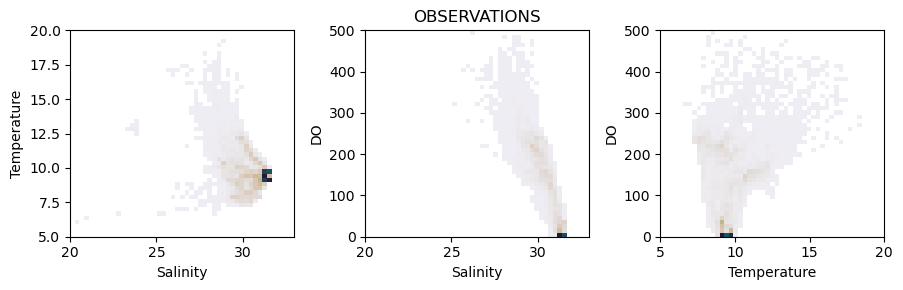

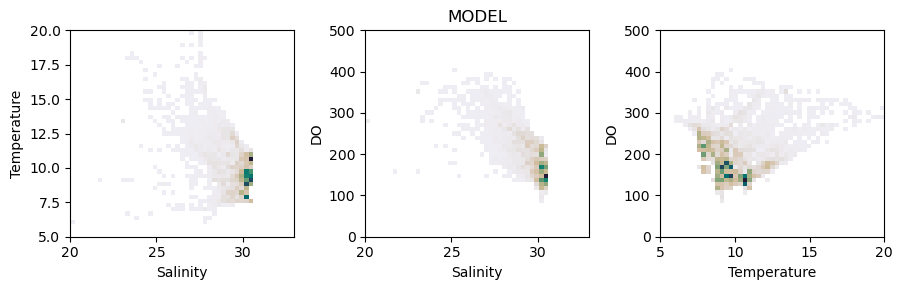

In [140]:
# obs versus model property property plots
print('property of water masses in Saanich Inlet (2011-2019)')
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

#obs
prop_prop(axs[0],"Salinity","Temperature",df_SI.SA,df_SI.CT,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",df_SI.SA,df_SI["Oxygen_Dissolved"],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",df_SI.CT,df_SI["Oxygen_Dissolved"],Tbin,Dbin)
axs[1].set_title('OBSERVATIONS')
plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 
prop_prop(axs[0],"Salinity","Temperature",df_SI.mod_vosaline,df_SI.mod_votemper,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",df_SI.mod_vosaline,df_SI["mod_dissolved_oxygen"],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",df_SI.mod_votemper,df_SI["mod_dissolved_oxygen"],Tbin,Dbin)
axs[1].set_title('MODEL')
plt.tight_layout()

property of water masses in Hood Canal (2011-2018)


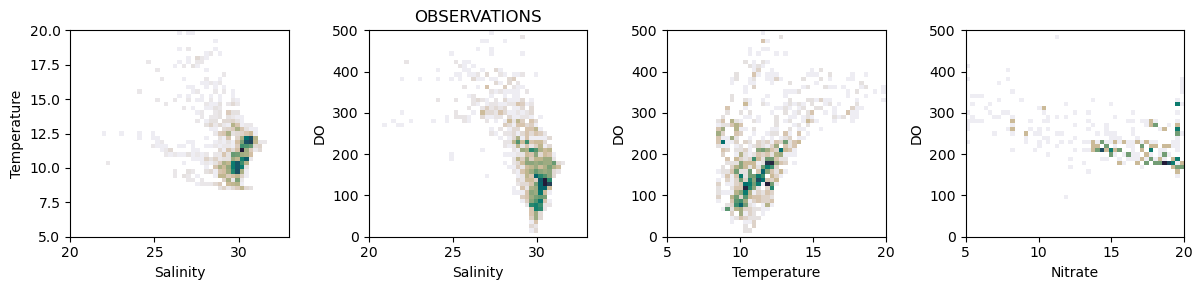

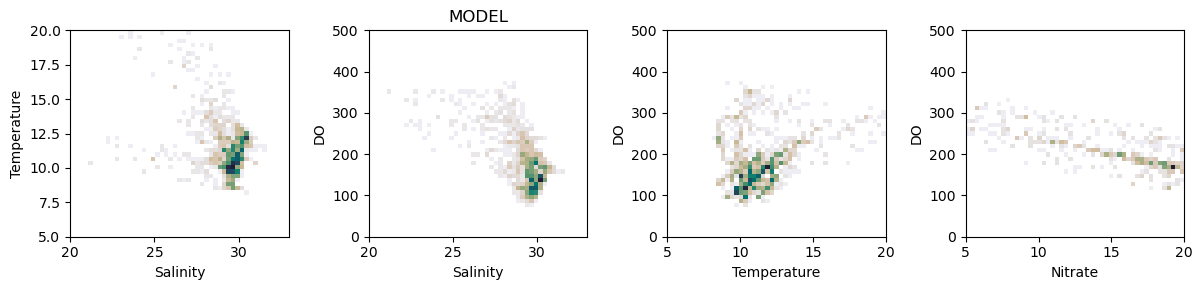

In [141]:
# obs versus model property property plots
print('property of water masses in Hood Canal (2011-2018)')
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

#obs
prop_prop(axs[0],"Salinity","Temperature",df_HC_ncei.SA,df_HC_ncei.CT,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",df_HC_ncei.SA,df_HC_ncei["Oxygen_Dissolved"],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",df_HC_ncei.CT,df_HC_ncei["Oxygen_Dissolved"],Tbin,Dbin)
prop_prop(axs[3],"Nitrate","DO",df_HC_ncei.N,df_HC_ncei["Oxygen_Dissolved"],Tbin,Dbin)
axs[1].set_title('OBSERVATIONS')
plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 
prop_prop(axs[0],"Salinity","Temperature",df_HC_ncei.mod_vosaline,df_HC_ncei.mod_votemper,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",df_HC_ncei.mod_vosaline,df_HC_ncei["mod_dissolved_oxygen"],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",df_HC_ncei.mod_votemper,df_HC_ncei["mod_dissolved_oxygen"],Tbin,Dbin)
prop_prop(axs[3],"Nitrate","DO",df_HC_ncei.mod_nitrate,df_HC_ncei["mod_dissolved_oxygen"],Tbin,Dbin)
axs[1].set_title('MODEL')
plt.tight_layout()